## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding

## Loading Dataset

In [2]:
data = pd.read_csv("/content/swiggy.csv")

In [3]:
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating', 'Food Item', 'Food Type', 'Delivery Time', 'Review']


## Text Cleaning and Sentiment Labeling

In [4]:
data["Review"] = data["Review"].str.lower()
data["Review"] = data["Review"].replace(r'[^a-z0-9\s]', '', regex=True)

In [5]:
data['sentiment'] = data['Avg Rating'].apply(lambda x: 1 if x > 3.5 else 0)
data = data.dropna()

## Tokenization and Padding

In [6]:
max_features =5000
max_length = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data["Review"])

x = pad_sequences(tokenizer.texts_to_sequences(data["Review"]),maxlen=max_length)
y = data["sentiment"]

## Train - Test - Split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify = y
)

xtrain,xval,ytrain,yval = train_test_split(
    xtrain,ytrain,test_size=0.1,random_state=42,stratify = ytrain
)

## Building RNN MODEL

In [8]:
model = Sequential([
    Embedding(input_dim=max_features,output_dim=128,input_length=max_length),
    SimpleRNN(64,activation="tanh"),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Training Model

In [9]:
hist = model.fit(
    xtrain,ytrain,
    epochs=25,
    batch_size=32,
    validation_data=(xval,yval),
    verbose=1
)

Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7116 - loss: 0.6066 - val_accuracy: 0.7156 - val_loss: 0.5969
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7200 - loss: 0.5962 - val_accuracy: 0.7156 - val_loss: 0.5971
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7148 - loss: 0.5995 - val_accuracy: 0.7156 - val_loss: 0.6072
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7127 - loss: 0.6041 - val_accuracy: 0.7156 - val_loss: 0.5971
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7193 - loss: 0.5955 - val_accuracy: 0.7156 - val_loss: 0.5984
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7142 - loss: 0.6001 - val_accuracy: 0.7156 - val_loss: 0.5967
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7207 - loss: 0.5916 - val_accuracy: 0.7156 - val_loss: 0.5963
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7179 - loss: 0.5955 - val_accu

## Model Evaluation

In [10]:
score = model.evaluate(xtest,ytest,verbose=0)
print(f"Test Accuracy:{score[1]:.2f}")

Test Accuracy:0.72


## Visualization

In [11]:
import matplotlib.pyplot as plt

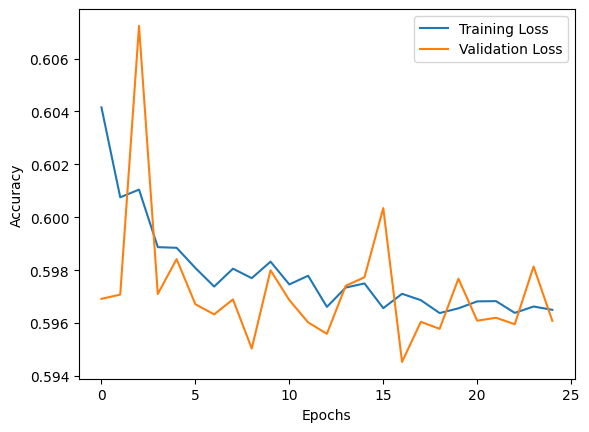

In [13]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Predicting Statement

In [14]:
def predict_sentiment(review_text):
    text = review_text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)

    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)

    prediction = model.predict(padded)[0][0]
    return f"{'Positive' if prediction >= 0.5 else 'Negative'} (Probability: {prediction:.2f})"

sample_review = "The food was great."
print(f"Review: {sample_review}")
print(f"Sentiment: {predict_sentiment(sample_review)}")


Review: The food was great.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Sentiment: Positive (Probability: 0.72)
